## Introduction:

<span style="font-size:20px">In this notebook, I am doing sentiment analysis on 1000 tweets I gathered around the July 9th -July 11th after India lost the ICC Cricket World Cup Men semifinals to New-zealand. I just wanted to gauge the emotion running in the country India.</span>

### Where did the data come from?

<span style="font-size:20px">I used the twitter developer account to use the data API's to give the tweets with the hashtag #INDvsNZ. I hit the end point https://api.twitter.com/1.1/tweets/search/30day/development.json from my post man client to gather these tweets</span>

### Code

In [71]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
with open('./INDVSNZ_O_1') as json_file:  
    data = json.load(json_file)
tweets = [ tweet['text'] for tweet in data['results'] ]

In [6]:
tweets

['I’m not just a fan of winning team India I’m a fan of team India... 🇮🇳 #TeamIndia #INDVsNZ',
 'Should @ICC conducts playoffs for upcoming #wcc #WorldCup2019 #INDvsNZ #INDvNZL #AUSvENG #donotretiredhoni… https://t.co/gKQ0xlhjYM',
 'One of those days where top order fails to deliver! \nMan! I am still in that zone😥\nWhy cricket is so cruel? 😥\n#INDvsNZ #CWC19 #',
 'Wtf!\nHandscommb given not out after England review. Why is it imp? Well, @imVkohli was given out yesterday in the s… https://t.co/fATv6UWsaA',
 'Hard luck #TeamIndia ! \n\nBut we must also congratulate @imjadeja &amp; @msdhoni for the fighting spirit shown in the… https://t.co/3ZqYESp9Io',
 "If it hadn't rained, the result might have been different.\n#INDvsNZ #CWC19 #TeamIndia",
 'Your performance in Semi made us to feel of lifting the WC you go champ #WorldCup2019 #INDvsNZ https://t.co/FmPTGW9abK',
 "Heartiest Respect and thank you team india for giving us everything' #INDvsNZ",
 "@abpnewstv The options should be:\n\n1. AB

### Cleaning the data:

In [5]:
alltweets = ''
for twee in tweets:
    twee = re.sub(r'INDvsNZ','',twee)
    twee = re.sub(r'indvsnz','',twee)
    twee = re.sub(r'India','',twee)
    twee = re.sub(r'team|Team','',twee)
    twee = re.sub(r'guy','',twee)
    twee = re.sub(r'cricket','',twee)
    
    alltweets = alltweets+twee
alltweets = re.sub(r'{}.*?{}'.format(re.escape('https'),re.escape(' ')),'',alltweets)

## what are people talking about?

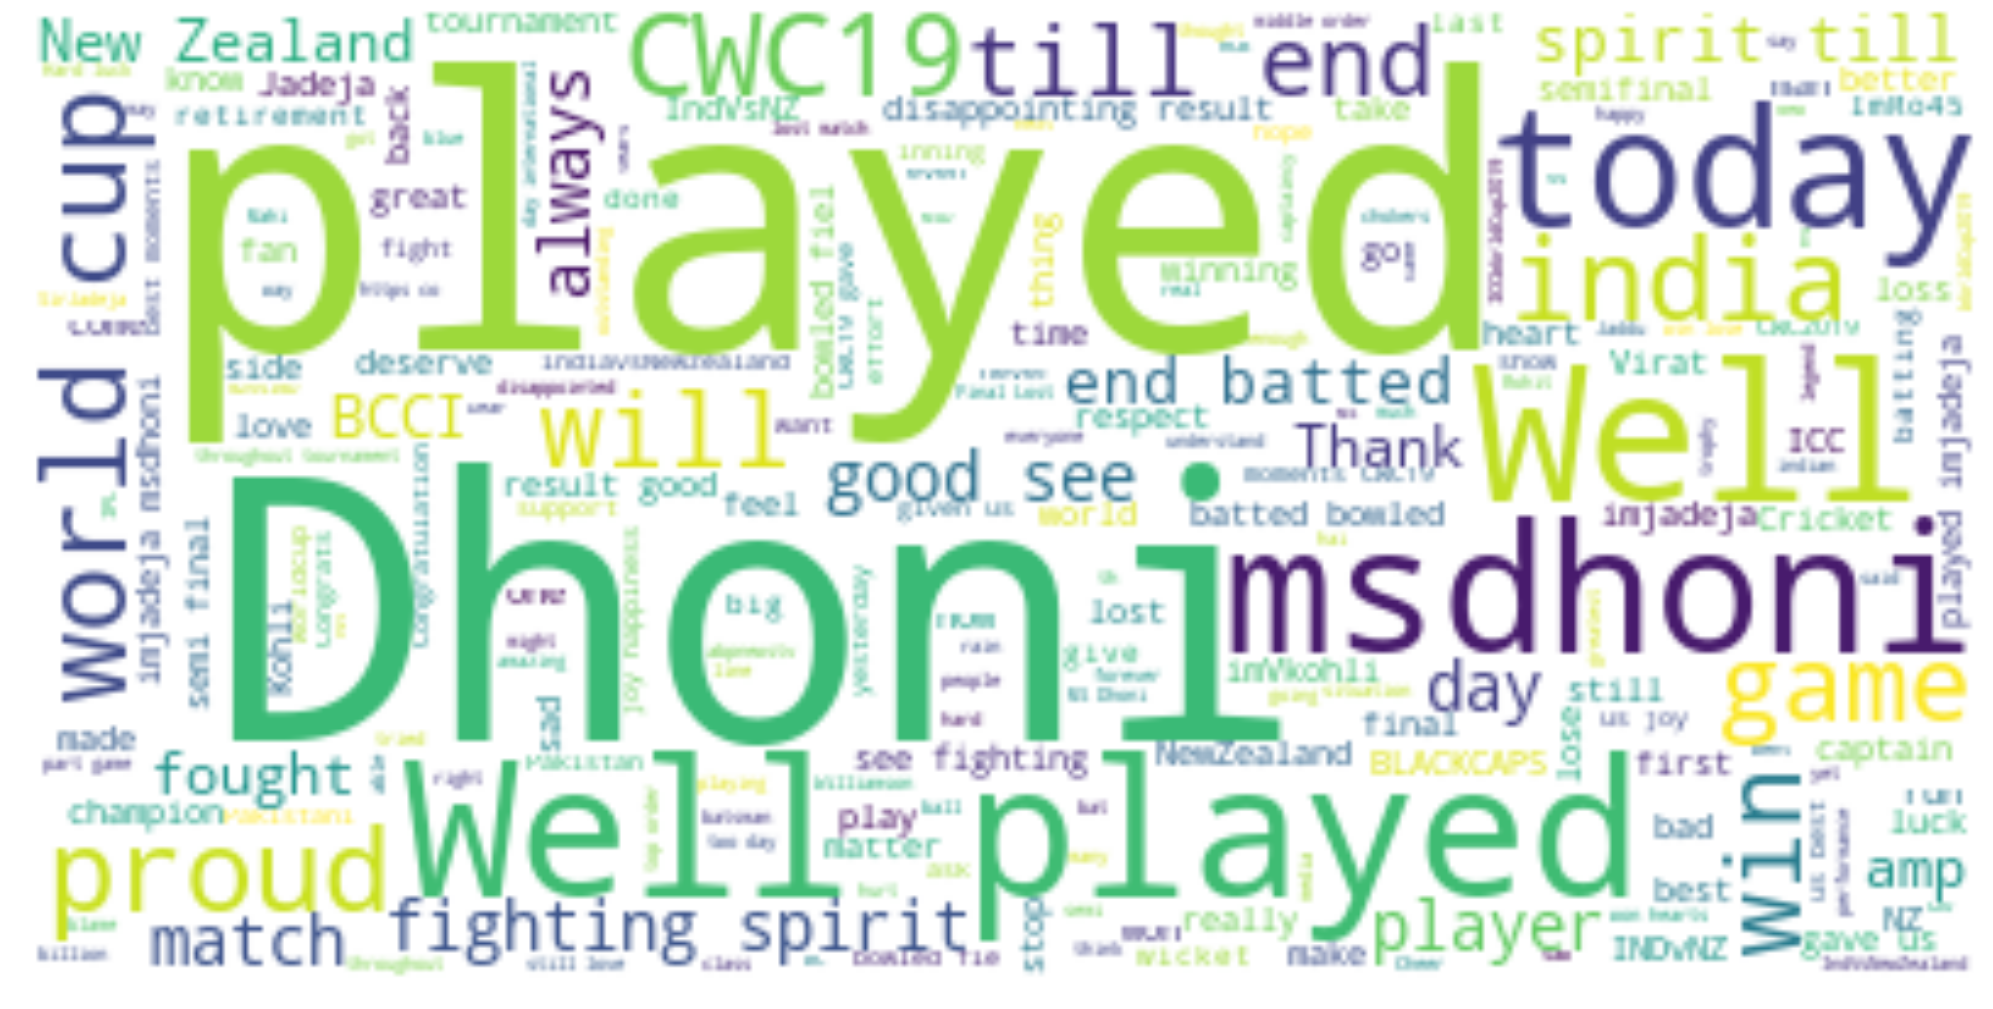

In [102]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Create and generate a word cloud image:
# alltweets = ''.join(tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,max_words=1000,background_color="white").generate(alltweets)
plt.figure(figsize=(35,30))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


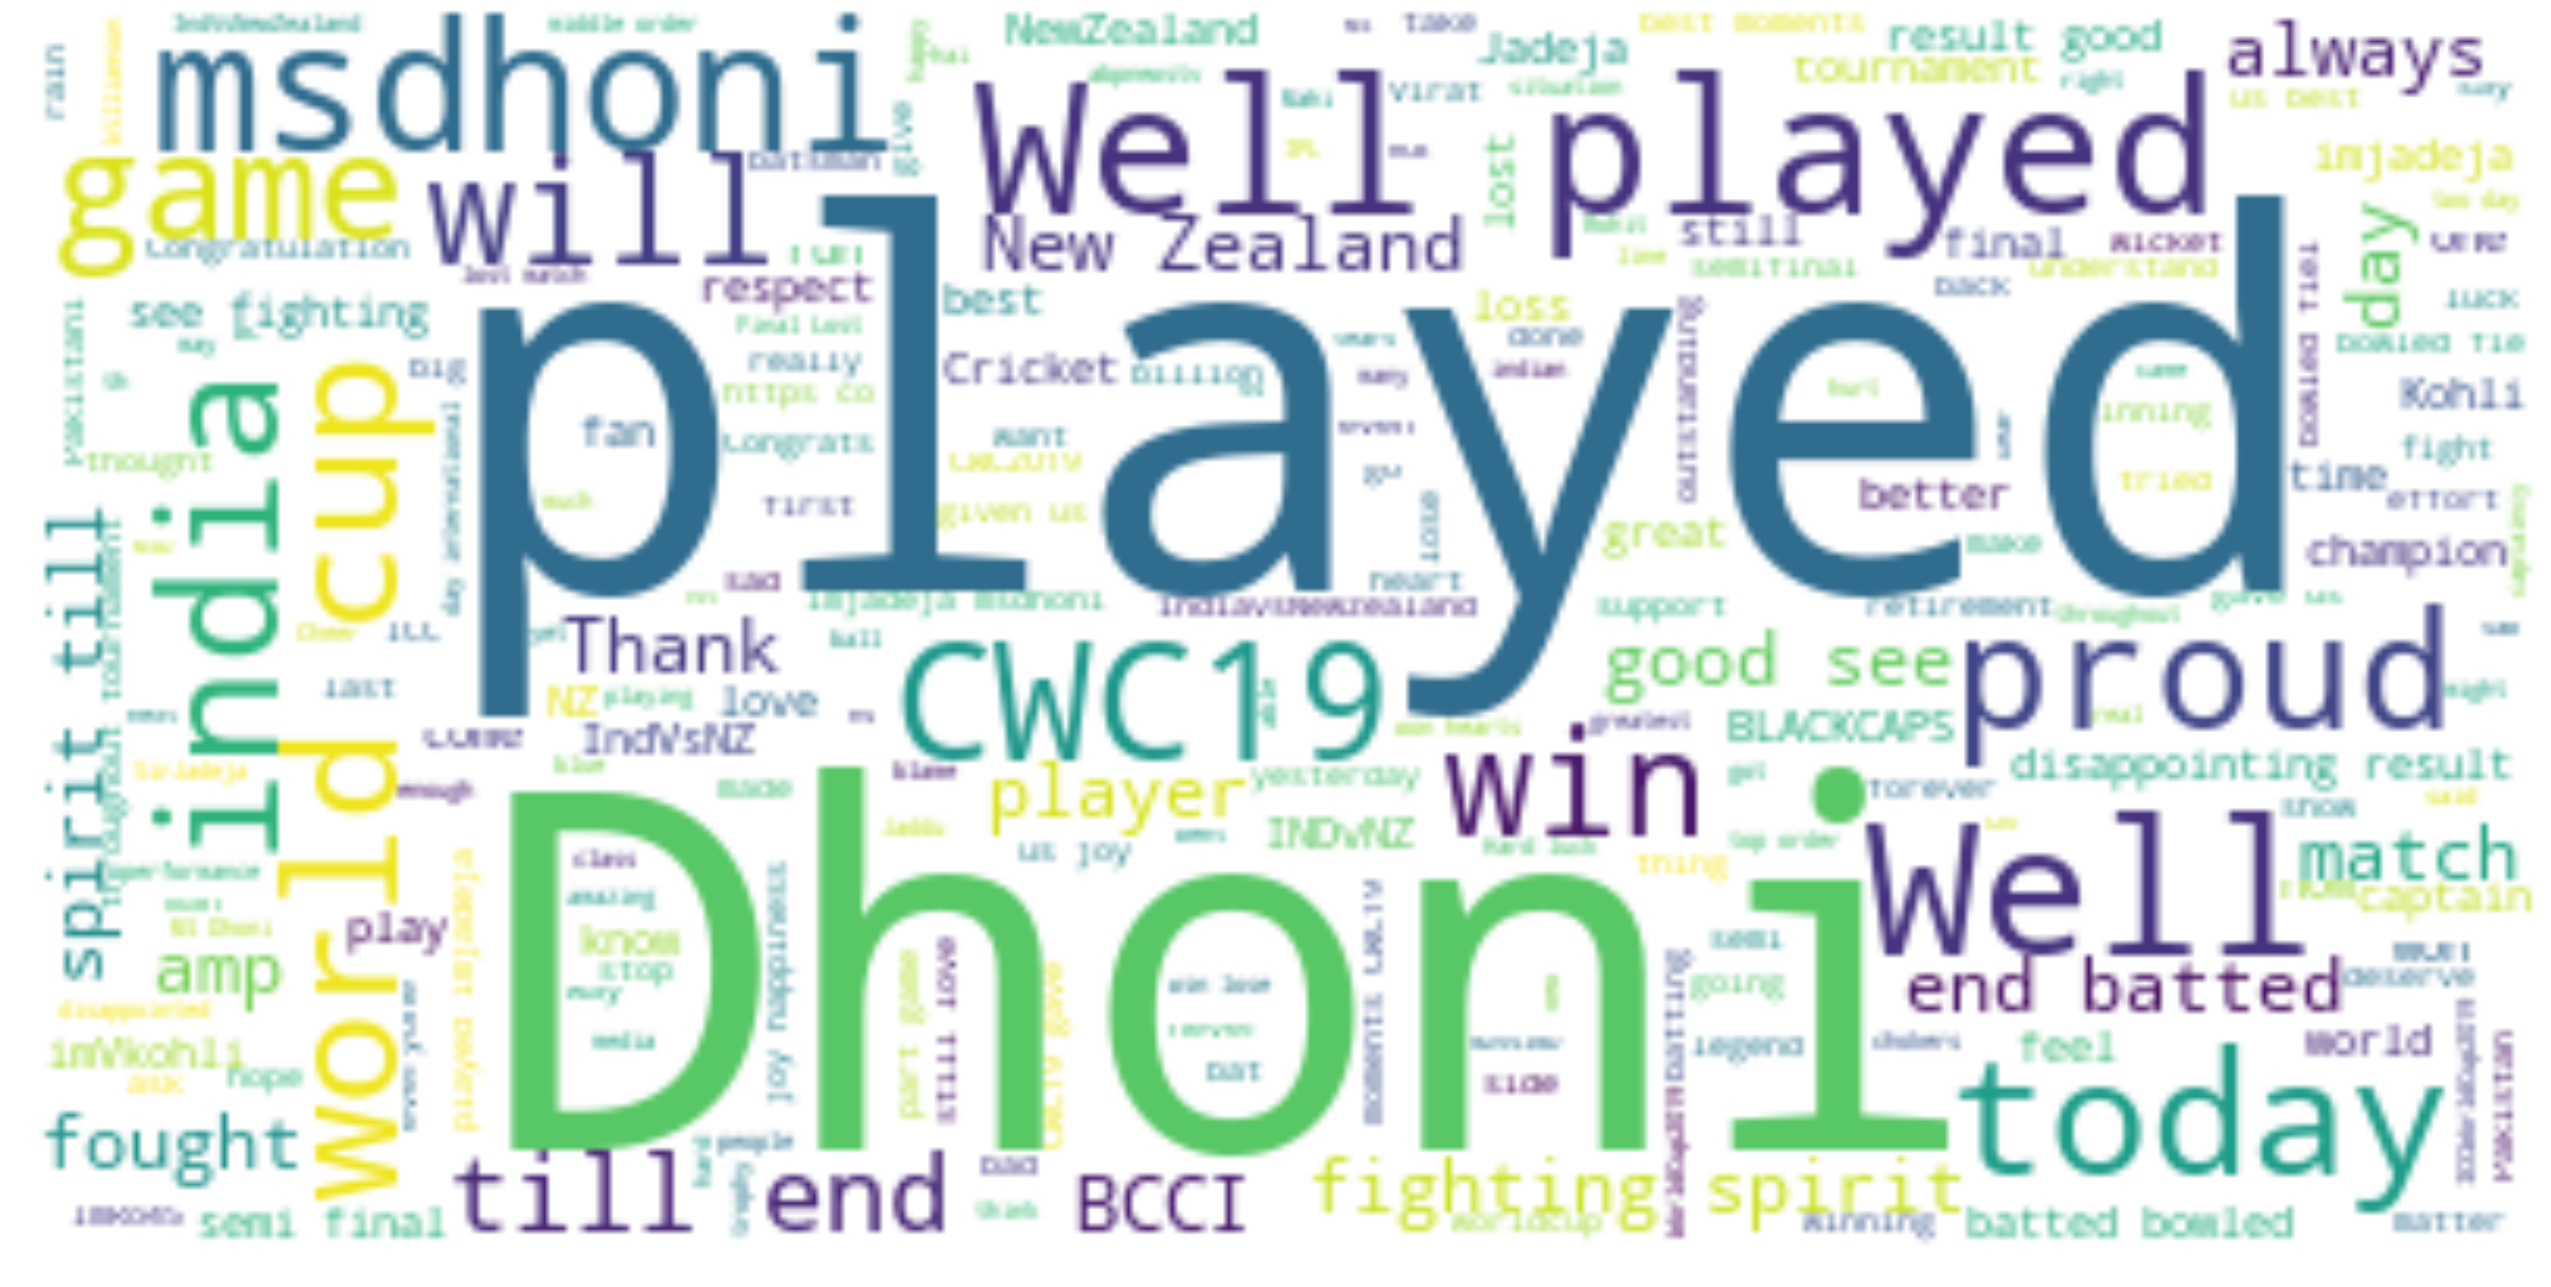

In [103]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Create and generate a word cloud image:
# alltweets = ''.join(tweets)
wordcloud = WordCloud(stopwords=stopwords,max_words=500,background_color="white").generate(alltweets)
plt.figure(figsize=(45,30))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

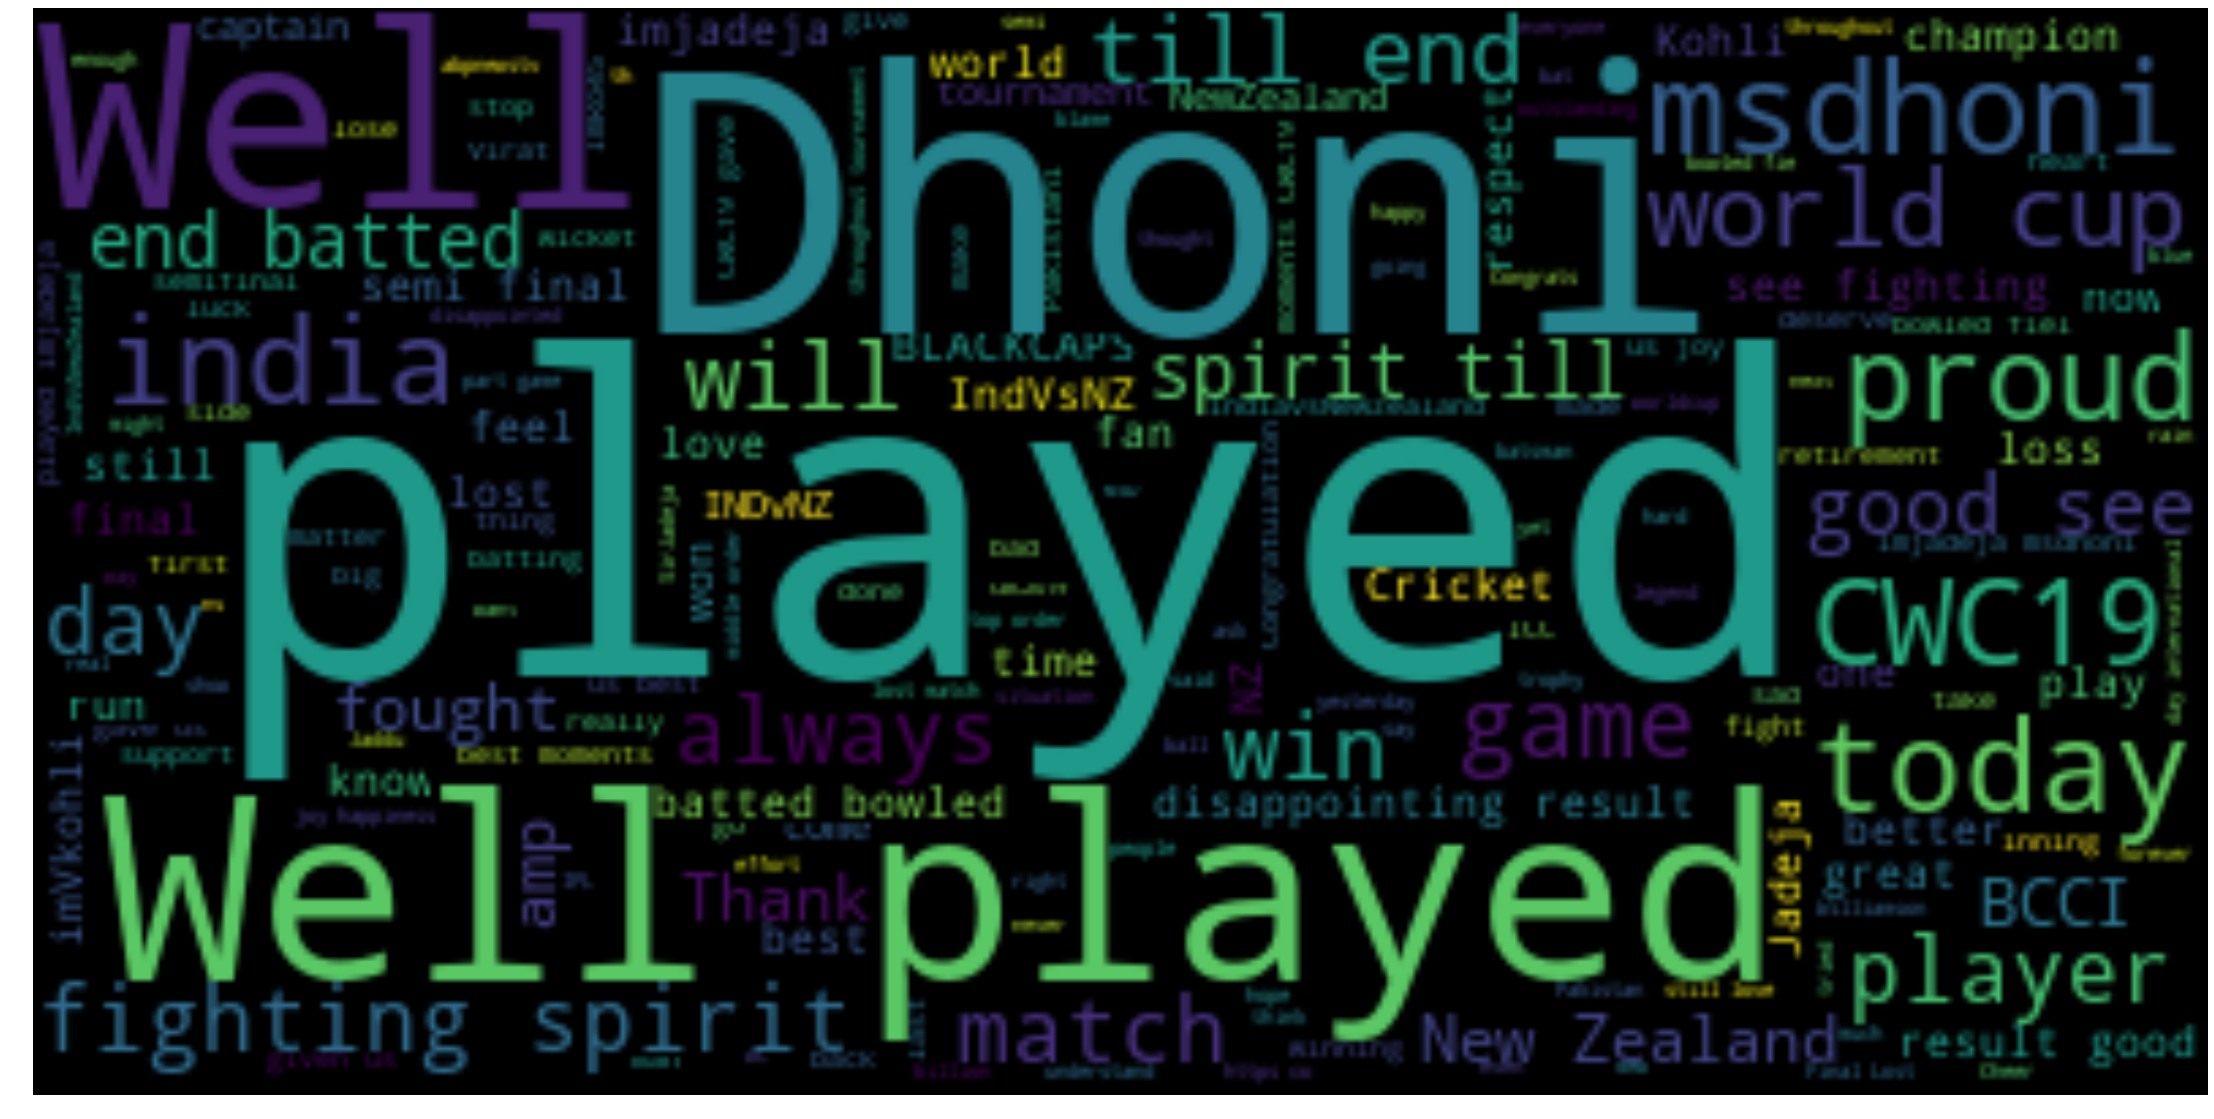

In [104]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Create and generate a word cloud image:
# alltweets = ''.join(tweets)
wordcloud = WordCloud(stopwords=stopwords,max_words=1500).generate(alltweets)
plt.figure(figsize=(50,20))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Now to Imp stuff - Sentiment Analysis

### 1) use the texblob modelue to help us classifiy positive and negative tweets

In [11]:
 def get_tweet_sentiment(tweet): 
        from textblob import TextBlob 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(tweet) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

In [12]:
def get_tweets(tweets): 
    alltweets = [] 
    
    for tweet in tweets:
        parsed_tweet={}
        parsed_tweet['text'] = tweet
        parsed_tweet['sentiment'] = get_tweet_sentiment(tweet) 

        alltweets.append(parsed_tweet) 

    # return parsed tweets 
    return alltweets 


In [13]:
alltweets = get_tweets(tweets)

In [14]:
alltweets

[{'text': 'I’m not just a fan of winning team India I’m a fan of team India... 🇮🇳 #TeamIndia #INDVsNZ',
  'sentiment': 'positive'},
 {'text': 'Should @ICC conducts playoffs for upcoming #wcc #WorldCup2019 #INDvsNZ #INDvNZL #AUSvENG #donotretiredhoni… https://t.co/gKQ0xlhjYM',
  'sentiment': 'neutral'},
 {'text': 'One of those days where top order fails to deliver! \nMan! I am still in that zone😥\nWhy cricket is so cruel? 😥\n#INDvsNZ #CWC19 #',
  'sentiment': 'negative'},
 {'text': 'Wtf!\nHandscommb given not out after England review. Why is it imp? Well, @imVkohli was given out yesterday in the s… https://t.co/fATv6UWsaA',
  'sentiment': 'negative'},
 {'text': 'Hard luck #TeamIndia ! \n\nBut we must also congratulate @imjadeja &amp; @msdhoni for the fighting spirit shown in the… https://t.co/3ZqYESp9Io',
  'sentiment': 'negative'},
 {'text': "If it hadn't rained, the result might have been different.\n#INDvsNZ #CWC19 #TeamIndia",
  'sentiment': 'neutral'},
 {'text': 'Your performance i

In [15]:
df= pd.DataFrame(alltweets)

In [16]:
df.head()

sentiment                                               text
0  positive  I’m not just a fan of winning team India I’m a...
1   neutral  Should @ICC conducts playoffs for upcoming #wc...
2  negative  One of those days where top order fails to del...
3  negative  Wtf!\nHandscommb given not out after England r...
4  negative  Hard luck #TeamIndia ! \n\nBut we must also co...

In [126]:
df[df['sentiment'] == 'negative']

sentiment                                               text
2    negative  One of those days where top order fails to del...
3    negative  Wtf!\nHandscommb given not out after England r...
4    negative  Hard luck #TeamIndia ! \n\nBut we must also co...
9    negative  @anjanaomkashyap it's been quite a few hours n...
12   negative  Yesterday I saw my God #MSDhoni Crying I saw t...
26   negative  We, Indian should understand that, there are j...
35   negative  How to treat Broken Heart 💔... yet to come to ...
37   negative  Oh dear sport is such cruel thing \none nation...
61   negative  Except Rohit Sharma, You All Batsman Played Ve...
68   negative  And stop whining. The way the team fought back...
69   negative  Too much experiment at no  4 cost India  semif...
77   negative  As if one Arnab in the nation wasn’t enough! S...
80   negative  For a guy who is so so so expressive. Be it an...
92   negative  Well played #TeamIndia . Tough luck today. You...
97   negative  @abpnewstv Nobody!!! it’s a team game! Today w...
110  negative  Indian cricket fans are the most annoying and ...
114  negative  India has never won a world cup with a BJP gov...
116  negative  The irony is the fastest runner between the wi...
118  negative  I know it's very disappointed results.  But yo...
121  negative  Disappointed and grief always comes like a bul...
122  negative  Turning Point - Chahal last over went for 18 r...
123  negative  Let's get it straight India lost this match du...
130  negative  Spineless people like you who are behind such ...
132  negative  #INDvsNZ #CWC2019 #CWC19 #TeamIndia After the ...
137  negative  This philosophy of ‘ you won hearts and respec...
139  negative  How to stop thinking about today's Match ? I c...
142  negative  What a horrible poll to run. Tsk tsk. \n\n#IND...
147  negative  Tonight it is not right. Something is missing....
148  negative  Well played @msdhoni.. Well played @imjadeja.....
157  negative  #INDvsNZ dear @msdhoni , we might not see you ...
..        ...                                                ...
434  negative  This happens when we make ordinary people as G...
439  negative  The viewership for the finals just went down b...
441  negative  Today @BCCI would know the importance of havin...
442  negative           Worst\nIs\nComing\n#Dhoni\n🥺🥺🥺\n#INDvsNZ
445  negative  Well played #MSDhoni , bad luck team #India , ...
455  negative  Bhumrah and Rohit 😒 So sad for both ..! Well F...
459  negative  You made it possible from a difficult situatio...
482  negative              💔💔feel like crying 😭😭 #INDvsNZ #CWC19
490  negative  We have lost this match, but we can still hold...
502  negative  #Dhoni gave us hope. Did not give up. Tried re...
504  negative  Before blaming @msdhoni think about what he ha...
515  negative  #INDvsNZ Sad, we lost. Very sad. But we did sh...
516  negative  A bad day, but they won ❣️🇮🇳 @msdhoni @imjadej...
519  negative  #INDvsNZ fuck off @imVkohli why the fuck you b...
520  negative                             Disappointed. #IndvsNz
521  negative     Unbelievable ! Disappointed !\n@ICC #INDvsNZ 😔
523  negative  #Thala wouldn’t have expected that hit! \n\n#I...
524  negative  Still not able to understand why #MSDhoni came...
544  negative  Well played India it was a pressure game ,Cong...
546  negative  #INDvsNZ well played team India. Hard lock we ...
550  negative  Feeling sad for team India but Sir Jadeja won ...
553  negative  Dear Pakistanis India is still ahead of your p...
566  negative  #INDvsNZ hopeful and dreadful has a very thin ...
569  negative  Congrats NZ ...\nWorse performance ever by tea...
573  negative  The underdogs played well in this game... abso...
576  negative  WTF this bloody #Dhoni @YUVSTRONG12\nYour fath...
583  negative       Seriously all out??? 🙄🙈🙈😫😫😫\n#INDvsNZ #CWC19
585  negative  Well played India. \nYou went down fighting. \...
591  negative                           bad luck guys ! #INDvsNZ
597  negative    #INDvsNZ people still 

In [129]:
df[df == 'negative'] = 0
df[df == 'positive'] = 1

In [130]:
df.head()

sentiment                                               text
0         1  I’m not just a fan of winning team India I’m a...
1   neutral  Should @ICC conducts playoffs for upcoming #wc...
2         0  One of those days where top order fails to del...
3         0  Wtf!\nHandscommb given not out after England r...
4         0  Hard luck #TeamIndia ! \n\nBut we must also co...

## 2) Trying Vader Library to help us qualify to positive and negative tweets

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [18]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
#     print("{:-<40} {}".format(sentence, str(score)))
    return score

In [27]:
def get_sentiments(tweets): 
    alltweets = [] 
    
    for tweet in tweets:
        parsed_tweet={}
        parsed_tweet['text'] = tweet
        score = sentiment_analyzer_scores(tweet) 
        if(score['compound'] >= 0.05):
            parsed_tweet['sentiment'] = 'positive'
        else:
            parsed_tweet['sentiment'] = 'negative'

        alltweets.append(parsed_tweet) 

    # return parsed tweets 
    return alltweets 

In [28]:
alltweets2 = get_sentiments(tweets)

In [29]:
alltweets2

[{'text': 'I’m not just a fan of winning team India I’m a fan of team India... 🇮🇳 #TeamIndia #INDVsNZ',
  'sentiment': 'positive'},
 {'text': 'Should @ICC conducts playoffs for upcoming #wcc #WorldCup2019 #INDvsNZ #INDvNZL #AUSvENG #donotretiredhoni… https://t.co/gKQ0xlhjYM',
  'sentiment': 'negative'},
 {'text': 'One of those days where top order fails to deliver! \nMan! I am still in that zone😥\nWhy cricket is so cruel? 😥\n#INDvsNZ #CWC19 #',
  'sentiment': 'negative'},
 {'text': 'Wtf!\nHandscommb given not out after England review. Why is it imp? Well, @imVkohli was given out yesterday in the s… https://t.co/fATv6UWsaA',
  'sentiment': 'negative'},
 {'text': 'Hard luck #TeamIndia ! \n\nBut we must also congratulate @imjadeja &amp; @msdhoni for the fighting spirit shown in the… https://t.co/3ZqYESp9Io',
  'sentiment': 'positive'},
 {'text': "If it hadn't rained, the result might have been different.\n#INDvsNZ #CWC19 #TeamIndia",
  'sentiment': 'negative'},
 {'text': 'Your performance

In [30]:
df2= pd.DataFrame(alltweets)

In [44]:
df2.head()

sentiment                                               text
0  positive  I’m not just a fan of winning team India I’m a...
1  negative  Should @ICC conducts playoffs for upcoming #wc...
2  negative  One of those days where top order fails to del...
3  negative  Wtf!\nHandscommb given not out after England r...
4  positive  Hard luck #TeamIndia ! \n\nBut we must also co...

In [45]:
df2[df2 == 'negative'] = 0
df2[df2 == 'positive'] = 1

In [46]:
df2.head()

sentiment                                               text
0         1  I’m not just a fan of winning team India I’m a...
1         0  Should @ICC conducts playoffs for upcoming #wc...
2         0  One of those days where top order fails to del...
3         0  Wtf!\nHandscommb given not out after England r...
4         1  Hard luck #TeamIndia ! \n\nBut we must also co...

## 3) Use of Bag of Words and Scikit-Learn, to tokenize the tweets and use Logistic Regression to classify the tweets

In [92]:
l1= []
for t in df2['text']:
    t = re.sub(r'#\w+','',t)
    l1.append(t)
    

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import FrenchStemmer

stemmer = FrenchStemmer()
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

vect = CountVectorizer(stop_words='english',min_df=10,ngram_range=(1, 2))
vect.fit(l1)
X_train = vect.transform(l1)

y_train = df2['sentiment']
y_train=y_train.astype('int')

In [114]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV().fit(X_train, y_train)



/anaconda3/envs/applied_ml/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/applied_ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/applied_ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/applied_ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/applied_ml/lib/python3.7/site-packages/sklearn/linear

### Use the most important and least importangt features to get the positive and negative sentiments words

In [115]:
def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(False)

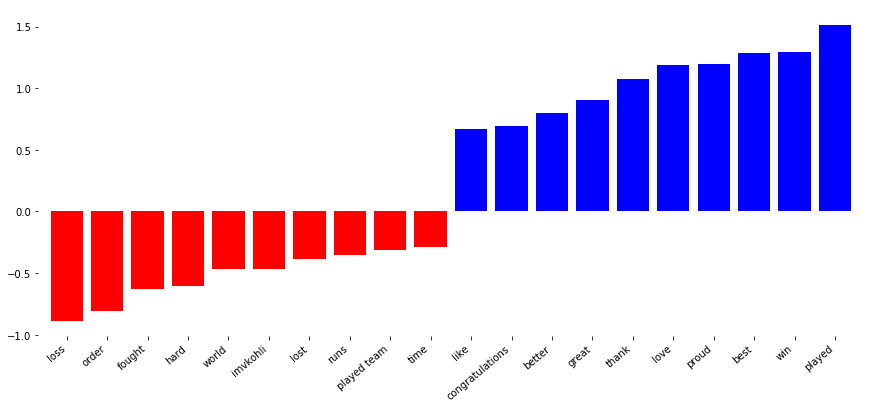

In [116]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(vect.get_feature_names()), top_n=10, rotation=40)
ax = plt.gca()